<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Means_of_Central_Tendency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats as stats
import numpy as np

In [3]:
x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

print(f'Mean of x1: {np.mean(x1)}')
print(f'Mean of x2: {np.mean(x2):0.4f}')

Mean of x1: 3.625
Mean of x2: 14.3333


In [6]:
## weighted mean
weight = 1 / len(x1)
x11 = [x * weight for x in x1]
x22 = [x * weight for x in x2]
print(f'Weighted mean of x1: {np.mean(x11)}')
print(f'Weight mean of x2: {np.mean(x22):0.4f}')

Weighted mean of x1: 0.453125
Weight mean of x2: 1.7917


### Median

In [7]:
print(f'Median of x1: {np.median(x1)}')
print(f'Median of x2: {np.median(x2)}')

Median of x1: 3.5
Median of x2: 4.0


### Mode

In [11]:
stats.mode(x1)[0]

2

In [12]:
def mode(inputs):
    counts = {}
    for e in inputs:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1

    max_count = 0
    modes = {}
    for key, value in counts.items():
        if value > max_count:
            max_count = value
            modes = {key}
        elif value == max_count:
            modes.add(key)
    if max_count > 1 or len(inputs) == 1:
        return list(modes)
    return 'No mode'

print(f'All modes of x1: {mode(x1)}')

All modes of x1: [2, 5]


In [14]:
import yfinance as yf

In [15]:
# Get return data for an asset and compute the mode of the dataset
start = '2014-01-01'
end = '2015-01-01'

pricing = yf.download(tickers='SPY', start=start, end=end)
pricing

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,183.979996,184.070007,182.479996,182.919998,152.196274,119636900
2014-01-03,183.229996,183.600006,182.630005,182.889999,152.171341,81390600
2014-01-06,183.490005,183.559998,182.080002,182.360001,151.730286,108028200
2014-01-07,183.089996,183.789993,182.949997,183.479996,152.662231,86144200
2014-01-08,183.449997,183.830002,182.889999,183.520004,152.695480,96582300
...,...,...,...,...,...,...
2014-12-24,208.020004,208.339996,207.720001,207.770004,176.250336,42963400
2014-12-26,208.309998,208.850006,208.250000,208.440002,176.818680,57326700
2014-12-29,208.220001,208.970001,208.139999,208.720001,177.056259,79643900


In [26]:
returns = pricing['Close'].pct_change()[1:]
hist, bins = np.histogram(returns, 20)
maxfreq = np.max(hist)
vals = [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq]
print(f'Mode of returns: {mode(returns)}')
print(f'Mode of bins: {vals}')

Mode of returns: No mode
Mode of bins: [(-0.0012499981123169877, 0.0011117022955209332)]


### Geometric mean

In [27]:
print(f'Geometric mean of x1: {stats.gmean(x1)}')
print(f'Geometric mean of x2: {stats.gmean(x2)}')

Geometric mean of x1: 3.0941040249774403
Geometric mean of x2: 4.552534587620071


In [28]:
ratios = returns + np.ones(shape=returns.shape[0])
R_G = stats.gmean(ratios) - 1
print(f'Geometric mean of returns: {R_G}')

Geometric mean of returns: 0.00046461682827958484


In [34]:
T = returns.shape[0]
init_price = pricing['Close'][0]
final_price = pricing['Close'][-1]
print(f'Initial price: {init_price}')
print(f'Final price: {final_price}')
print(f'Final price as computed: {init_price * (1 + R_G)**T}')

Initial price: 182.9199981689453
Final price: 205.5399932861328
Final price as computed: 205.53999328613


### Harmonic Mean

In [35]:
print(f'Harmonic mean of x1: {stats.hmean(x1)}')
print(f'Harmonic mean of x2: {stats.hmean(x2)}')

Harmonic mean of x1: 2.5590251332825593
Harmonic mean of x2: 2.869723656240511


## Questions

In [36]:
## data
l=[]
for x in range(1,100):
    x=np.random.randint(1,100)
    l.append(x)

### 1. Mean

In [37]:
# a. Mean of random data set
np.mean(l)

46.898989898989896

In [42]:
# b. mean of returns
start = '2005-01-01'
end = '2010-01-01'
price = yf.download('ITI', start=start, end=end)[['Close']]
returns = price.pct_change()[1:]
print(f'\nMean of returns: {np.mean(returns)}')

[*********************100%%**********************]  1 of 1 completed


Mean of returns: -4.482282705837242e-05


### 2. Median

In [43]:
# Median of data set
print(f'median of l: {np.median(l)}')

median of l: 45.0


In [48]:
# Median for Bank of America
price = yf.download('BAC', start=start, end=end)[['Close']]
returns = price.pct_change()[1:]
print(f'\nMean of returns: {np.mean(returns)}')

[*********************100%%**********************]  1 of 1 completed


Mean of returns: 0.00012800828654452868


### 3. Mode

In [47]:
# mode of data set
mode(l)

[15]

In [50]:
# mode of returns for Goldman Sachs
price = yf.download('GS', start=start, end=end)[['Close']]
returns = price.pct_change()[1:]
print(f'\nMean of returns: {mode(returns)}')

[*********************100%%**********************]  1 of 1 completed


Mean of returns: No mode


In [52]:
hist, bins = np.histogram(returns, 20)
maxfreq = np.max(hist)
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of bins: [(-0.007886422320767805, 0.014827298691697327)]


### 4. Geometric Mean

In [53]:
print(f'Geometric mean of l: {stats.gmean(l)}')

Geometric mean of l: 33.00848090823866


In [61]:
# Geometric mean of returns
price = yf.download('C', start='2005-01-01', end='2010-01-01')[['Open']]
print(f'\nMean of returns: {stats.gmean(price.Open)}')

[*********************100%%**********************]  1 of 1 completed


Mean of returns: 232.5769756281446


### Skewness

In [71]:
price = yf.download('SPY', start='2005-01-01', end='2010-01-01')[['Volume']]
returns = price.Volume.pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed


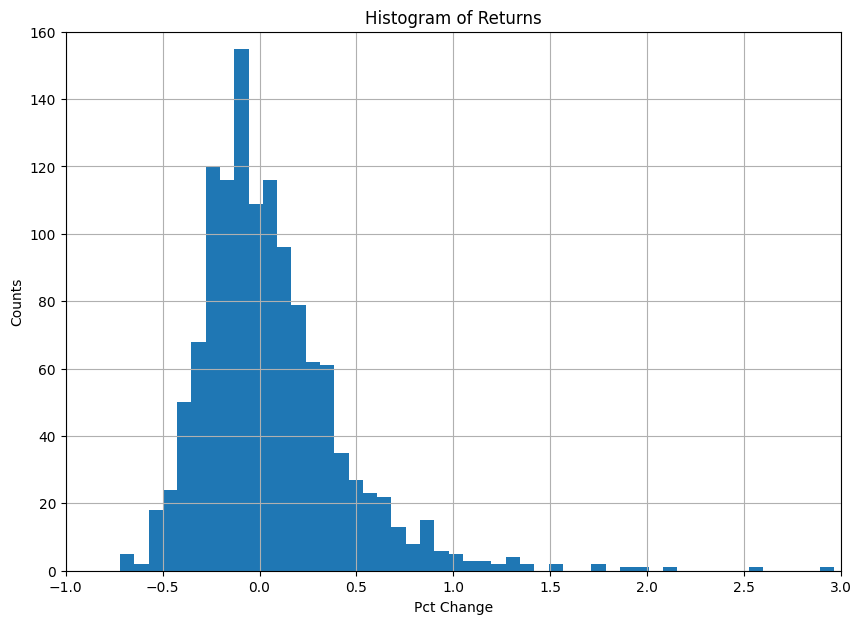

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Histogram of Returns')
returns.hist(bins=50, ax=ax)
ax.set_ylim([0, 160])
ax.set_xlim([-1, 3.0])
ax.set_xlabel('Pct Change')
ax.set_ylabel('Counts')
plt.show()